# HOMEWORK 3

## Huijie Guan

In [42]:
import numpy as np
import pandas as pd
import scipy
import csv
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [43]:
file_location = "/Users/huijie/Desktop/hw/BA501-master/"
file_name = "BA501_python_data.csv"
my_data = pd.read_csv(file_location + file_name)

In [22]:
#print(my_data)

**1.How do you handle duplicate values in a dataset in Python?**


In [26]:
df = pd.DataFrame(my_data, columns = ['country', 'date', 'experiment_id', 'order_id', 'spend_used'])
df
#identify duplicates 
df.duplicated()
#drop duplicates 
df.drop_duplicates()

df.head()

,country,date,experiment_id,order_id,spend_used
0,JP,20170402,12624548,5813140433216629693,NaN
1,US,20170403,12624549,16333056276711034931,NaN
2,JP,20170404,12624548,11227119161741298366,NaN
3,US,20170403,12624548,11927299833124210932,NaN
4,JP,20170403,12624549,11644727017708872749,NaN



**2.You are given two tables - friend_request and request_accepted. Friend_request contains requester_id, time and sent_to_id and request_accepted table contains time, acceptor_id and requestor_id. How will you determine the overall acceptance rate of requests? 
(in sql and python)**

In [30]:
#friend_request(requester_id,time,sent_to_id)
#request_accepted(requester_id,time,acceptor_id)

#CODE IN SQL
#SELECT sum(if(r.acceptor_id is null, 0, 1))/ sum(r.requester_id) AS rate
#FROM friend_request f
#LEFT JOIN request_accepted r
#ON f.requester_id=r.requester_id


friend_request = pd.DataFrame(
    {"requester_id":[1,2,3,4,5],
     "time":["2017-07-17","2017-09-02","2017-09-03","2017-08-01","2017-08-02"],
     "sent_to_id":[6,7,8,9,10]}
)

request_accepted = pd.DataFrame(
    {"requester_id":[1,3,5],
     "time":["2017-07-17","2017-09-04","2017-08-02"],
     "acceptor_id":[6,8,10]}
)

print(friend_request)
print(request_accepted)


   requester_id  sent_to_id        time
0             1           6  2017-07-17
1             2           7  2017-09-02
2             3           8  2017-09-03
3             4           9  2017-08-01
4             5          10  2017-08-02
   acceptor_id  requester_id        time
0            6             1  2017-07-17
1            8             3  2017-09-04
2           10             5  2017-08-02


In [32]:
#LEFT JOIN IN SQL
a = pd.merge(friend_request,request_accepted,how="left",on="requester_id")
len(a["acceptor_id"][a.acceptor_id > 0])/(len(a["acceptor_id"])*1.0)

0.6

**3.Do some research and summarize the business model of your dream company, or company that you interview with.
  What is the product
  Who are the customer
  How do they make money
  Why do you want to work for this company?
  (Optional) If you were CEO, what would you do to increase company’s revenue in the next 5 years?**


Amazon

Product: 
1.General Retail
2.Third Party Sellers
3.Amazon Web Services
4.Kindle Family
5.Media and Content
6.Prime

Customer: 
1.Shoppers who are used to shop online
2.Enterprises need cloud service

How:
Increase their business to become the top one e-commerce comany in the states and the world
Turn more customers to loyal customers
Develope their own shipping system 

Why:
Seattle company 
Company's principles match my personal goals

**4.Similarly to PrintDailyTimeSeries() in the sample code, write a Python function called PrintCumulativeTimeSeries(). Specifically:**

**The function takes three inputs:
experiment_id
country
vertical**

**The function produces two outputs:
A time series chart showing the cumulative uplift (hint: search for cumsum)
Print out the cumulative % uplift on revenue, 
Print out the cumulative % uplift on revenue, experiment vs. control. Hint: (red - blue) / blue %**

**why cumulative? only care about the end.**


In [52]:

# deal with date format
my_data.date = pd.to_datetime(my_data.date, format='%Y-%m-%d')
my_data.date.head()
my_data.head(5)

,country,date,experiment_id,order_id,spend_usd,user_id,vertical
0,JP,2017-04-02,12624548,5813140433216629693,16.138855,5006730028073359543,ANDROID_APPS
1,US,2017-04-03,12624549,16333056276711034931,9.990000,5938685669571545259,ANDROID_APPS
2,JP,2017-04-04,12624548,11227119161741298366,19.887087,17623708458399141713,ANDROID_APPS
3,US,2017-04-03,12624548,11927299833124210932,19.990000,18042812344456618148,ANDROID_APPS
4,JP,2017-04-03,12624549,11644727017708872749,88.220093,4325104700699531031,ANDROID_APPS


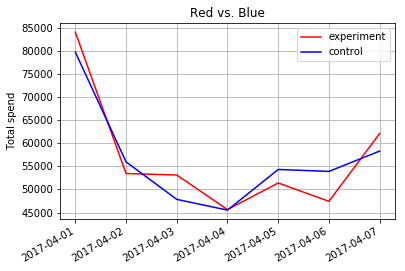

In [56]:
## sample code 

# function 1: for any given experiment_id, return a list group by date
def GetSeries(my_data, my_id):
    table = my_data[["date", "spend_usd"]][my_data.experiment_id == my_id]
    series = table.groupby('date')['spend_usd'].sum()
    return(series)

# function 2: for any two series, plot the time series
def PlotSeries(experiment_series, control_series):
    fig, ax = plt.subplots()
    ax.plot(experiment_series, color="red", label="experiment")
    ax.plot(control_series, color="blue", label="control")
    ax.set_title("Red vs. Blue")
    ax.set_ylabel("Total spend")
    ax.grid(True, which="both")
    ax.legend()
    plt.gcf().autofmt_xdate()

# master function: 
def PrintDailyTimeSeries(my_data, experiment_ids):
    # make sure our x-axis is consistent
    index_series = np.unique(my_data.date) # unique date
    index_series = np.sort(index_series) # sort by date
    
    # data grouping
    my_data = my_data.sort_values("date", ascending=True, inplace=False)
    treatment_series = GetSeries(my_data, experiment_ids[0])
    control_series = GetSeries(my_data, experiment_ids[1])
    
    PlotSeries(treatment_series, control_series)
    
# test
PrintDailyTimeSeries(my_data, [12624548,12624549])

Cumulative impact: -2.46850453816%


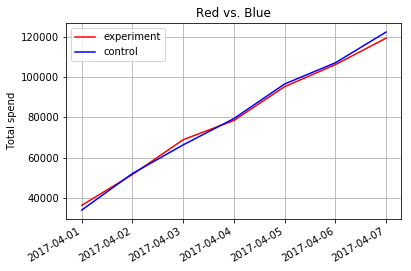

In [55]:
# now, PrintCumulativeTimeSeries()
# a few function to return the cumulative sum instead of sum


def GetCumulativeSeries(my_data, my_id, country):
    table = my_data[["date", "spend_usd"]][(my_data.experiment_id == my_id) & (my_data.country == country)]
    series = table.groupby('date')['spend_usd'].sum()
    series = np.cumsum(series)
    total_revenue = series[-1]
    return((series, total_revenue))

# alternate solution (pseudo code):
#   for date in our_dates:
#        this_value = series.spend_usd[series.date <= date].sum()
# you will be creating new series, very messy

# same as before
def PlotSeries(experiment_series, control_series):
    fig, ax = plt.subplots()
    ax.plot(experiment_series, color="red", label="experiment")
    ax.plot(control_series, color="blue", label="control")
    ax.set_title("Red vs. Blue")
    ax.set_ylabel("Total spend")
    ax.grid(True, which="both")
    ax.legend()
    plt.gcf().autofmt_xdate()
    
def PrintCumulativeTimeSeries(my_data, experiment_ids, country):
    # make sure our x-axis is consistent
    index_series = np.unique(my_data.date) # unique date
    index_series = np.sort(index_series) # sort by date
    
    # data grouping
    my_data = my_data.sort_values("date", ascending=True, inplace=False)
    treatment_series = GetCumulativeSeries(my_data, experiment_ids[0], country)[0]
    control_series = GetCumulativeSeries(my_data, experiment_ids[1], country)[0]
    treatment_revenue = GetCumulativeSeries(my_data, experiment_ids[0], country)[1]
    control_revenue = GetCumulativeSeries(my_data, experiment_ids[1], country)[1]
    
    print("Cumulative impact: " + str(treatment_revenue/control_revenue*100-100) + "%")
    PlotSeries(treatment_series, control_series)

PrintCumulativeTimeSeries(my_data, [12624548,12624549], "JP")
